# Spectral analysis I

In [1]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

from data import get_periodic_process
from utils import get_figure, time_plot, acovf_plot, plot_fft, arma_theoretical_spectral_density

c:\Users\LUKY\Repos\HSLU\time\notebooks\data.py:12: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## Periodic process

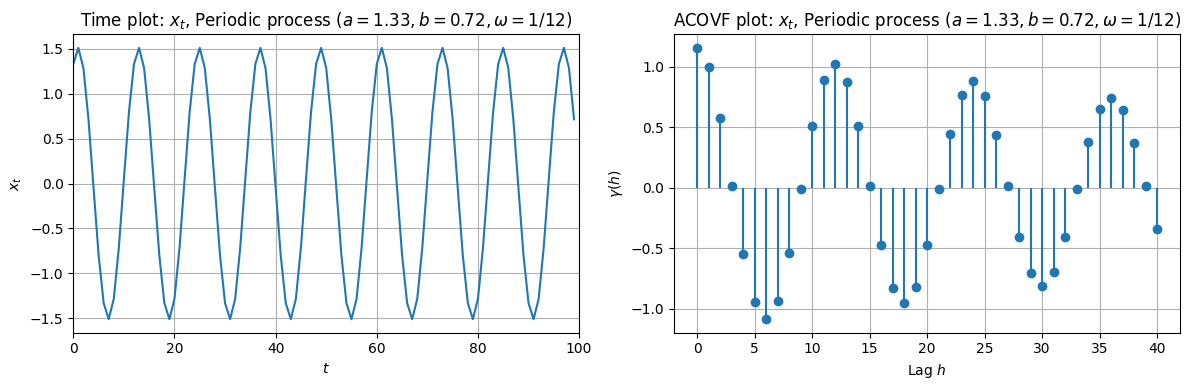

In [2]:
n = 100
x_t, x_name = get_periodic_process(seed=10, npoints=n, sd=1, period=12)
fig, (ax1, ax2) = get_figure(ncols=2)
time_plot(
    np.arange(n),
    x_t,
    title=f"$x_t$, {x_name}",
    prefix_title=True,
    ax=ax1,
    xlim=(0, 100),
)
acovf_plot(
    x_t,
    40,
    title=f"$x_t$, {x_name}",
    ax=ax2,
)
fig.tight_layout()

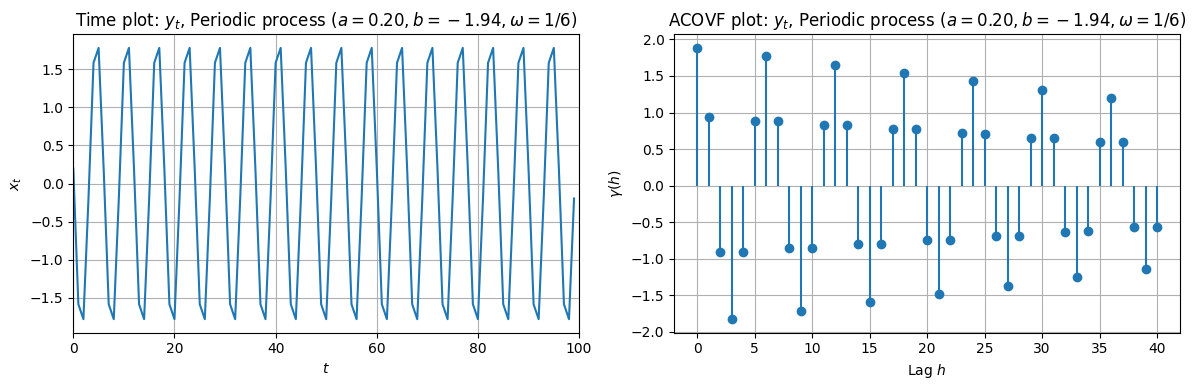

In [3]:
y_t, y_name = get_periodic_process(seed=26, npoints=n, sd=1, period=6)
fig, (ax1, ax2) = get_figure(ncols=2)
time_plot(
    np.arange(n),
    y_t,
    title=f"$y_t$, {y_name}",
    prefix_title=True,
    ax=ax1,
    xlim=(0, 100),
)
acovf_plot(
    y_t,
    40,
    title=f"$y_t$, {y_name}",
    ax=ax2,
)
fig.tight_layout()

### Mixtures of periodic series

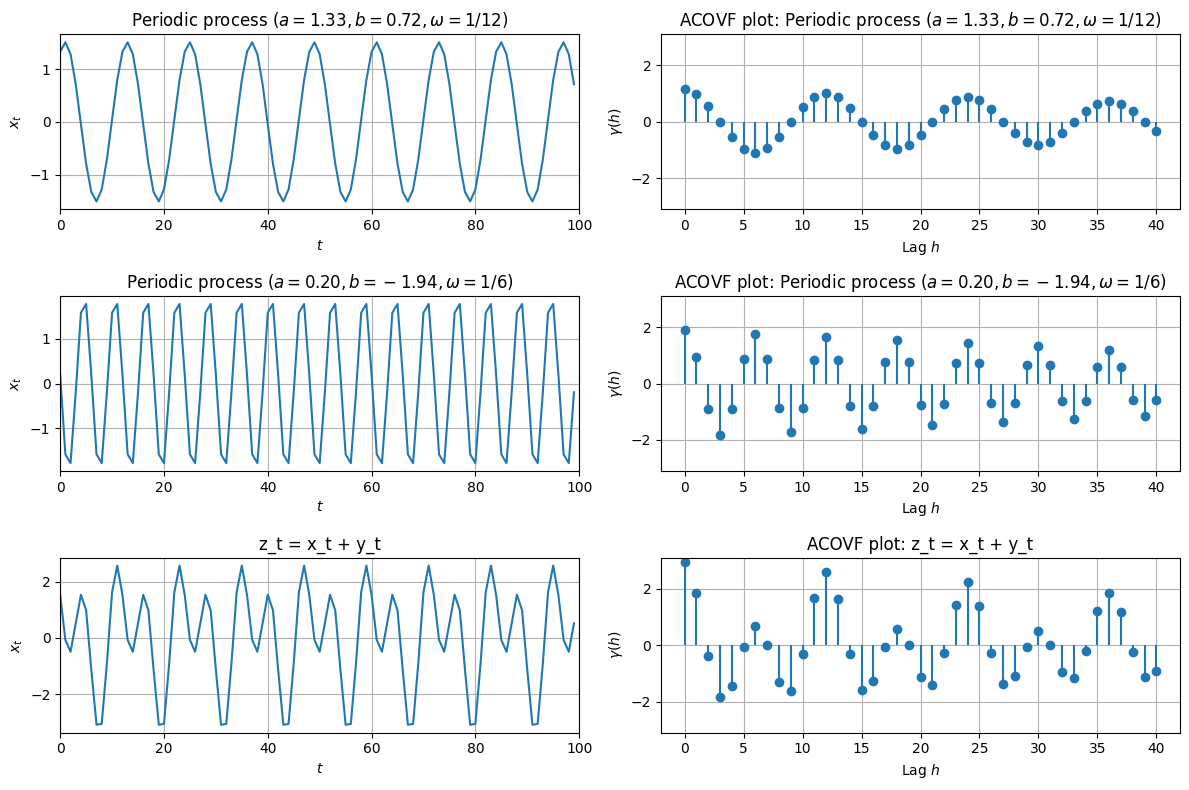

In [4]:
z_t = x_t + y_t
fig, axs = get_figure(3, 2, figsize=(12, 8))
for i, (x, name) in enumerate([(x_t, x_name), (y_t, y_name), (z_t, "z_t = x_t + y_t")]):
    time_plot(
        np.arange(n),
        x,
        title=f"{name}",
        ax=axs[i*2],
        xlim=(0, 100),
    )
    acovf_plot(
        x,
        40,
        title=f"{name}",
        ax=axs[i*2+1],
    )
    axs[i*2+1].set_ylim(-3.1, 3.1)
fig.tight_layout()

## Periodogram

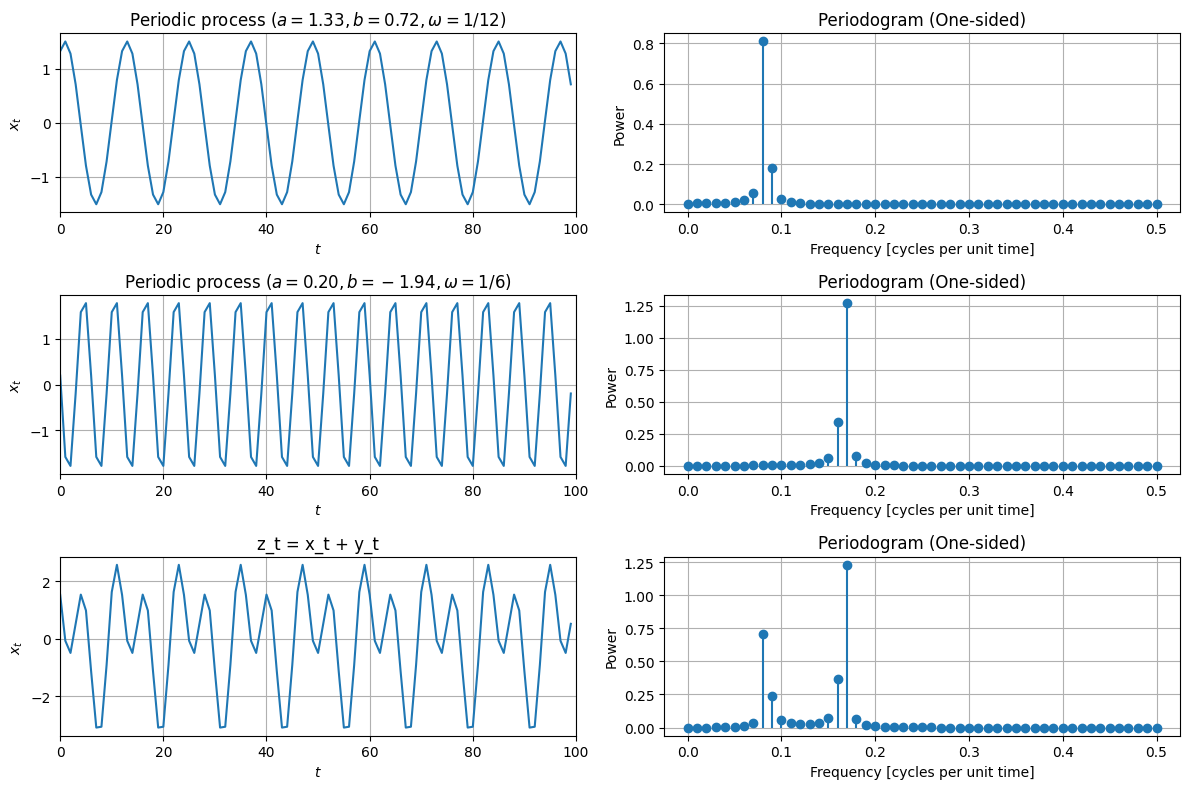

In [5]:
fig, axs = get_figure(3, 2, figsize=(12, 8))
for i, (x, name) in enumerate([(x_t, x_name), (y_t, y_name), (z_t, "z_t = x_t + y_t")]):
    time_plot(
        np.arange(n),
        x,
        title=f"{name}",
        ax=axs[i*2],
        xlim=(0, 100),
    )
    plot_fft(
        axs[i*2+1],
        x,
        periodogram=True,
    )
fig.tight_layout()

## Spectral density

### Moving average process

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\LUKY\AppData\Local\Temp\ipykernel_27232\2621238395.py:11: SyntaxWarning: invalid escape sequence '\s'
  title="Spectral Density of MA(1) Process with $W_t\sim \mathcal{N}(0, 1)$",


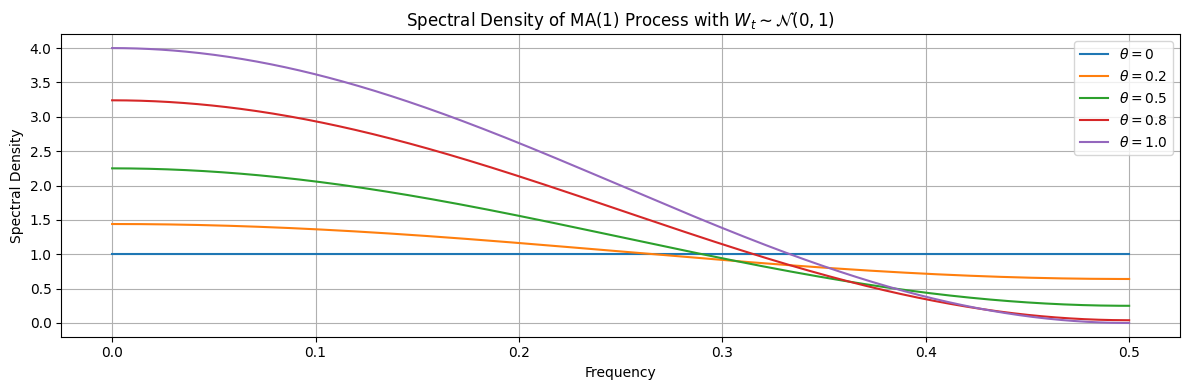

In [6]:
sigma = 1
theta_values = [0, 0.2, 0.5, 0.8, 1.0]
frequencies = np.linspace(0, 0.5, 500)

fig, [ax] = get_figure()
for theta in theta_values:
    spectral_density = sigma**2 * (1 + theta**2 + 2 * theta * np.cos(2 * np.pi * frequencies))
    time_plot(
        frequencies,
        spectral_density,
        title="Spectral Density of MA(1) Process with $W_t\sim \mathcal{N}(0, 1)$",
        xlabel="Frequency",
        ylabel="Spectral Density",
        label=f"$\\theta = {theta}$",
        ax=ax,
    )
ax.legend()
fig.tight_layout()

### Autoregressive process

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\LUKY\AppData\Local\Temp\ipykernel_27232\3394655760.py:11: SyntaxWarning: invalid escape sequence '\s'
  title="Spectral Density of AR(1) Process with $W_t\sim \mathcal{N}(0, 1)$",


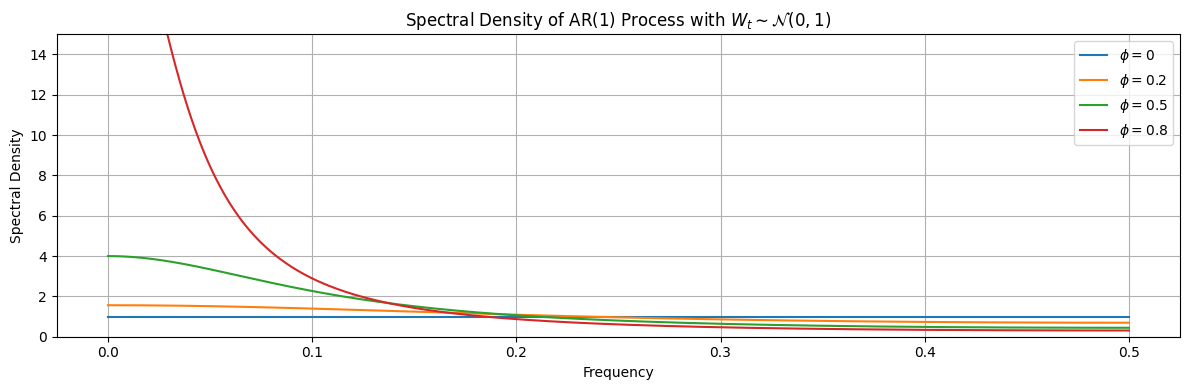

In [7]:
sigma = 1
phi_values = [0, 0.2, 0.5, 0.8]
frequencies = np.linspace(0, 0.5, 500)

fig, [ax] = get_figure()
for phi in phi_values:
    spectral_density = sigma**2 / (1 - 2 * phi * np.cos(2 * np.pi * frequencies) + phi**2)
    time_plot(
        frequencies,
        spectral_density,
        title="Spectral Density of AR(1) Process with $W_t\sim \mathcal{N}(0, 1)$",
        xlabel="Frequency",
        ylabel="Spectral Density",
        label=f"$\\phi = {phi}$",
        ax=ax,
        ylim=(0, 15),
    )
ax.legend()
fig.tight_layout()

### ARMA(p,q) process

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\LUKY\AppData\Local\Temp\ipykernel_27232\160065176.py:21: SyntaxWarning: invalid escape sequence '\s'
  title="Spectral Density of ARMA(p,q) Process with $W_t\sim \mathcal{N}(0, 1)$",


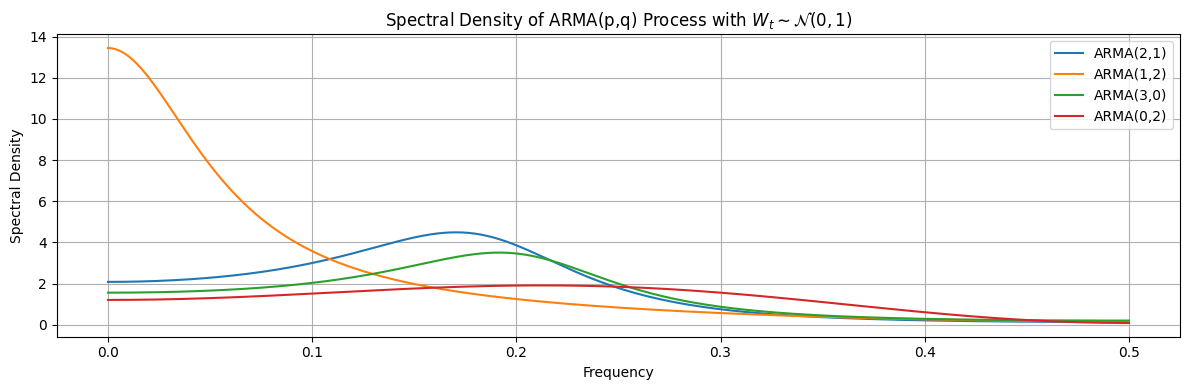

In [8]:
sigma = 1
frequencies = np.linspace(0, 0.5, 500)
arma_configs = [
    {"phi": [0.5, -0.4], "theta": [0.3], "label": "ARMA(2,1)"},
    {"phi": [0.7], "theta": [0.2, -0.1], "label": "ARMA(1,2)"},
    {"phi": [0.6, -0.5, 0.1], "theta": [], "label": "ARMA(3,0)"},
    {"phi": [], "theta": [0.4, -0.3], "label": "ARMA(0,2)"},
]

fig, [ax] = get_figure()
for config in arma_configs:
    phi = config["phi"]
    theta = config["theta"]
    label = config["label"]
    
    spectral_density = arma_theoretical_spectral_density(frequencies, sigma, phi, theta)

    time_plot(
        frequencies,
        spectral_density,
        title="Spectral Density of ARMA(p,q) Process with $W_t\sim \mathcal{N}(0, 1)$",
        xlabel="Frequency",
        ylabel="Spectral Density",
        label=label,
        ax=ax,
    )
fig.tight_layout()

## Periodogram and spectral density

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\LUKY\AppData\Local\Temp\ipykernel_27232\199112857.py:29: SyntaxWarning: invalid escape sequence '\s'
  title=f"Spectral Density of {label} Process with $W_t\sim \mathcal{{N}}(0, 1)$",


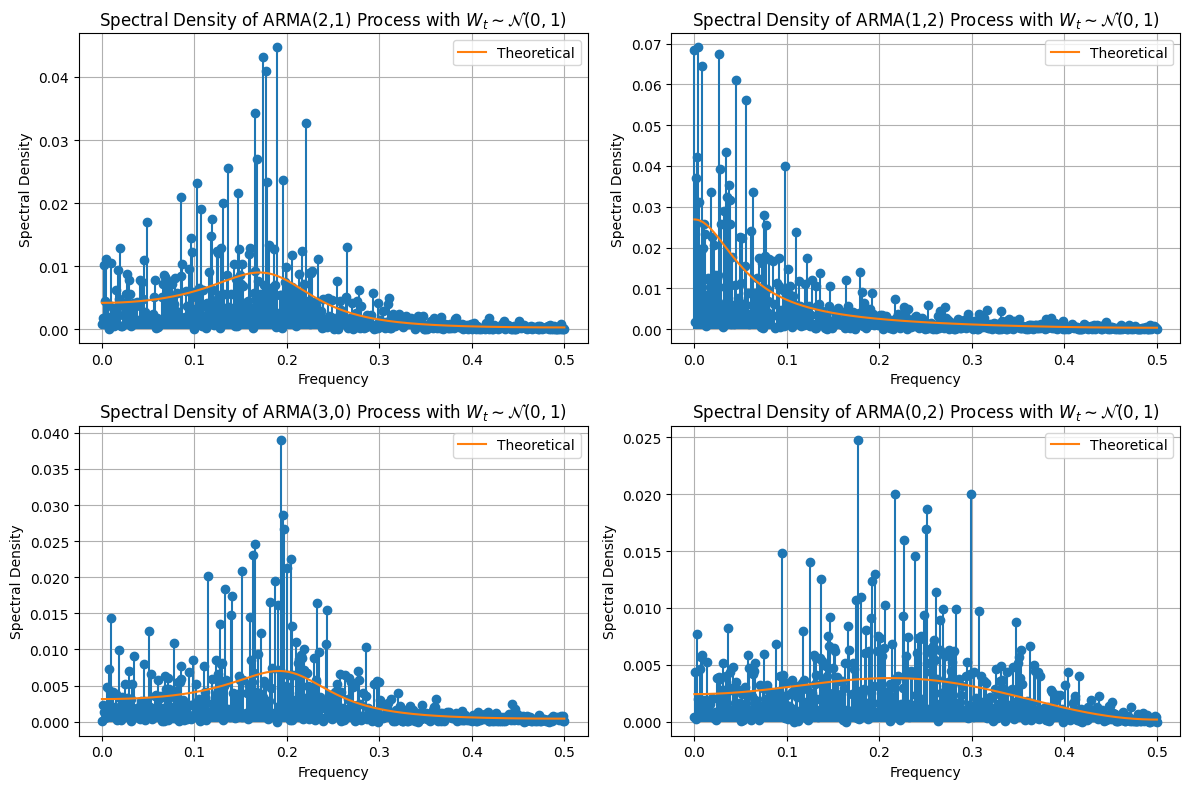

In [9]:
np.random.seed(42)
n = 1000
sigma = 1
frequencies = np.linspace(0, 0.5, n)
nrows= np.ceil(len(arma_configs)/2)
fig, axs = get_figure(nrows=len(arma_configs)//2, ncols=2, figsize=(12, 8))
for ax, config in zip(axs, arma_configs):
    phi = config["phi"]
    theta = config["theta"]
    label = config["label"]
    
    model = ArmaProcess(
        ar=np.r_[1, -np.array(phi)],
        ma=np.r_[1, np.array(theta)],
    )
    arma_series = model.generate_sample(nsample=n)
    spectral_density = arma_theoretical_spectral_density(frequencies, sigma, phi, theta)
    # Multiply by two for the negative frequencies, divide by n to relate to the periodogram since P(w) = f(w)/n
    spectral_density = 2*spectral_density/n         
    plot_fft(
        ax,
        arma_series,
        periodogram=True,
    )
    
    time_plot(
        frequencies,
        spectral_density,
        title=f"Spectral Density of {label} Process with $W_t\sim \mathcal{{N}}(0, 1)$",
        xlabel="Frequency",
        ylabel="Spectral Density",
        label="Theoretical",
        ax=ax,
    )
fig.tight_layout()